In [ ]:
!pip install ultralytics

In [ ]:
import os
import pandas as pd
from ultralytics import YOLO
from pathlib import Path

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#All original models

In [ ]:
from ultralytics import YOLO
import pandas as pd
from pathlib import Path

# List of models with names for output
models_info = [
    ("YOLOv9s", "/content/drive/MyDrive/Lõputöö Mudel/models/YOLOv9s/custom_yolov9s_colab2/weights/best.pt"),
    ("YOLOv8v", "/content/drive/MyDrive/Lõputöö Mudel/models/YOLOv8n/custom_yolov8n_colab2/weights/best.pt"),
    ("YOLOv11", "/content/drive/MyDrive/Lõputöö Mudel/models/custom_yolov11_colab4/weights/best.pt"),
    ("YOLOv9m", "/content/drive/MyDrive/Lõputöö Mudel/models/YOLOv9m/custom_yolov9m_colab/weights/best.pt")
]

# Paths
images_dir = Path('/content/drive/MyDrive/Lõputöö Mudel/data/split/val/images')
labels_dir = Path('/content/drive/MyDrive/Lõputöö Mudel/data/split/val/labels')

# Loop through each model
for model_name, model_path in models_info:
    print(f"Processing model: {model_name}")

    # Load model
    model = YOLO(model_path)

    # Prepare results container
    results_data = []

    # Iterate over images
    for image_path in images_dir.glob("*.jpg"):
        result = model(image_path)[0]

        # Count predicted people (class 0)
        predicted_persons = sum(1 for c in result.boxes.cls if int(c) == 0)

        # Ground truth
        label_path = labels_dir / f"{image_path.stem}.txt"
        if label_path.exists():
            with open(label_path, 'r') as f:
                true_persons = sum(1 for line in f if line.strip().startswith('0'))
        else:
            true_persons = 0

        # Append results
        results_data.append({
            'image': image_path.name,
            'predicted_persons': predicted_persons,
            'true_persons': true_persons
        })

    # Save to CSV
    df = pd.DataFrame(results_data)
    csv_output_path = f'/content/drive/MyDrive/Lõputöö Mudel/results_{model_name}.csv'
    df.to_csv(csv_output_path, index=False)
    print(f"Saved results to {csv_output_path}")


Streaming output truncated to the last 5000 lines.
image 1/1 /content/drive/MyDrive/Lõputöö Mudel/data/split/val/images/frame_435.jpg: 640x640 (no detections), 15.4ms
Speed: 2.2ms preprocess, 15.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Lõputöö Mudel/data/split/val/images/frame_487.jpg: 640x640 (no detections), 13.7ms
Speed: 4.3ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Lõputöö Mudel/data/split/val/images/frame_637.jpg: 640x640 2 humanss, 12.7ms
Speed: 2.6ms preprocess, 12.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Lõputöö Mudel/data/split/val/images/thermal2_0080_jpg.rf.64d9dd3aa3046545adbff59cb1eb710d.jpg: 640x640 1 humans, 16.7ms
Speed: 4.4ms preprocess, 16.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Lõputöö Mudel/data/split/val/

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
from pathlib import Path

# Directory where your result CSVs are stored
results_dir = Path('/content/drive/MyDrive/Lõputöö Mudel')

# List of model result files
csv_files = [
    'results_YOLOv9s.csv',
    'results_YOLOv8v.csv',
    'results_YOLOv11.csv',
    'results_YOLOv9m.csv'
]

# Compute and print MAE and RMSE for each model
for csv_file in csv_files:
    path = results_dir / csv_file
    df = pd.read_csv(path)

    true_counts = df['true_persons'].values
    predicted_counts = df['predicted_persons'].values

    mae = mean_absolute_error(true_counts, predicted_counts)
    rmse = np.sqrt(mean_squared_error(true_counts, predicted_counts))

    print(f"\nModel: {csv_file}")
    print(f"MAE (Mean Absolute Error): {mae:.2f}")
    print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")



Model: results_YOLOv9s.csv
MAE (Mean Absolute Error): 0.07
RMSE (Root Mean Squared Error): 0.30

Model: results_YOLOv8v.csv
MAE (Mean Absolute Error): 0.08
RMSE (Root Mean Squared Error): 0.34

Model: results_YOLOv11.csv
MAE (Mean Absolute Error): 0.04
RMSE (Root Mean Squared Error): 0.21

Model: results_YOLOv9m.csv
MAE (Mean Absolute Error): 0.09
RMSE (Root Mean Squared Error): 0.35


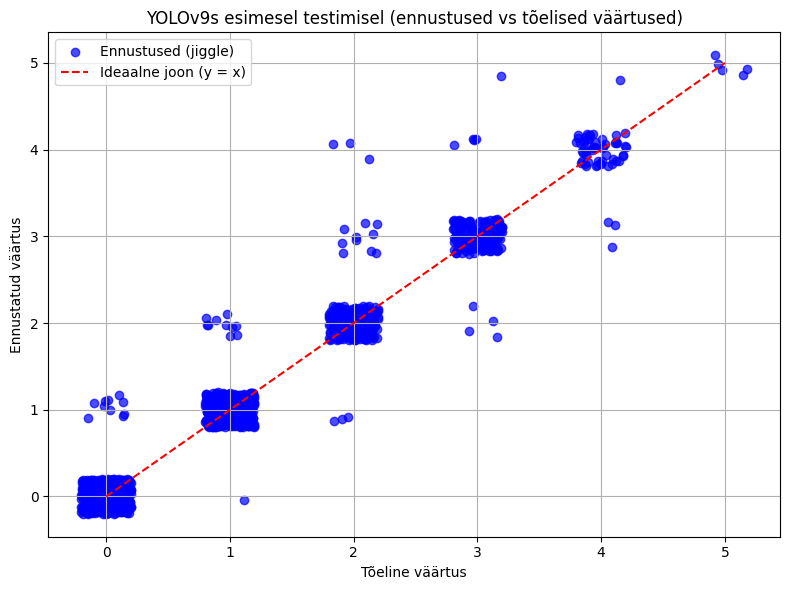

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lae CSV andmed
df = pd.read_csv('/content/drive/MyDrive/Lõputöö Mudel/results_YOLOv11.csv')

# Eeldame, et veerud on 'true_persons' ja 'predicted_persons'
true_values = df['true_persons']
predicted_values = df['predicted_persons']

# Lisa väike juhuslik müra (jiggle) täppidele, et need ei kattuks täielikult
jiggle_amount = 0.2  # saad muuta nt 0.2 kui tahad rohkem hajutust
true_values_jiggled = true_values + np.random.uniform(-jiggle_amount, jiggle_amount, size=len(true_values))
predicted_values_jiggled = predicted_values + np.random.uniform(-jiggle_amount, jiggle_amount, size=len(predicted_values))

# Graafiku joonistamine
plt.figure(figsize=(8, 6))
plt.scatter(true_values_jiggled, predicted_values_jiggled, color='blue', alpha=0.7, label='Ennustused (jiggle)')

# Lisa ideaaljoon y = x
min_val = min(true_values.min(), predicted_values.min())
max_val = max(true_values.max(), predicted_values.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideaalne joon (y = x)')

# Lisa sildid ja legend
plt.xlabel('Tõeline väärtus')
plt.ylabel('Ennustatud väärtus')
plt.title('YOLOv9s esimesel testimisel (ennustused vs tõelised väärtused)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Best model on test data 2

In [ ]:
# Load the trained model
model = YOLO('/content/drive/MyDrive/Lõputöö Mudel/models/YOLOv9sBest/custom_yolov11_colab/weights/best.pt')


# Paths
images_dir = Path('/content/drive/MyDrive/Lõputöö Mudel/val/images')
labels_dir = Path('/content/drive/MyDrive/Lõputöö Mudel/val/labels')  # usually .txt files

# Prepare dataframe to store results
results_data = []

# Iterate over all image files
for image_path in images_dir.glob("*.jpg"):  # Assuming images are .jpg
    # Run prediction
    result = model(image_path)[0]

    # Count detected people (assuming class 0 is person)
    predicted_persons = sum(1 for c in result.boxes.cls if int(c) == 0)

    # Get corresponding label file
    label_path = labels_dir / (image_path.stem + '.txt')

    # Count ground truth persons
    if label_path.exists():
        with open(label_path, 'r') as f:
            true_persons = sum(1 for line in f if line.strip().startswith('0'))  # Class 0 is person
    else:
        true_persons = 0

    # Append results
    results_data.append({
        'image': image_path.name,
        'predicted_persons': predicted_persons,
        'true_persons': true_persons
    })

# Convert to DataFrame
df = pd.DataFrame(results_data)

# Save to CSV
csv_output_path = '/content/drive/MyDrive/Lõputöö Mudel/parim_mudel_t2.csv'
df.to_csv(csv_output_path, index=False)

print(f"Results saved to {csv_output_path}")

Streaming output truncated to the last 5000 lines.
Speed: 2.1ms preprocess, 20.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Lõputöö Mudel/val/images/thermal2_0369_jpg.rf.ab988ca1319981e9efd93a63beb757a7.jpg: 640x640 1 humans, 20.2ms
Speed: 2.0ms preprocess, 20.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Lõputöö Mudel/val/images/aug_frame_2329_jpg.rf.9fa208d42e7105250b727abd6b754f55.jpg: 640x640 3 humanss, 23.1ms
Speed: 3.0ms preprocess, 23.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Lõputöö Mudel/val/images/aug_frame_2009_jpg.rf.4028d3839f438fcd5e110fe6fa7fae48.jpg: 640x640 2 humanss, 20.2ms
Speed: 2.1ms preprocess, 20.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Lõputöö Mudel/val/images/aug_cam4_0923_jpg.rf.5175213c2499d903026d712819537823.jpg: 640x640 1 

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the saved results
df = pd.read_csv('/content/drive/MyDrive/Lõputöö Mudel/parim_mudel_t2.csv')

# Extract true and predicted counts
true_counts = df['true_persons'].values
predicted_counts = df['predicted_persons'].values

# Compute MAE and RMSE
mae = mean_absolute_error(true_counts, predicted_counts)
rmse = np.sqrt(mean_squared_error(true_counts, predicted_counts))

print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")

MAE (Mean Absolute Error): 0.08
RMSE (Root Mean Squared Error): 0.34


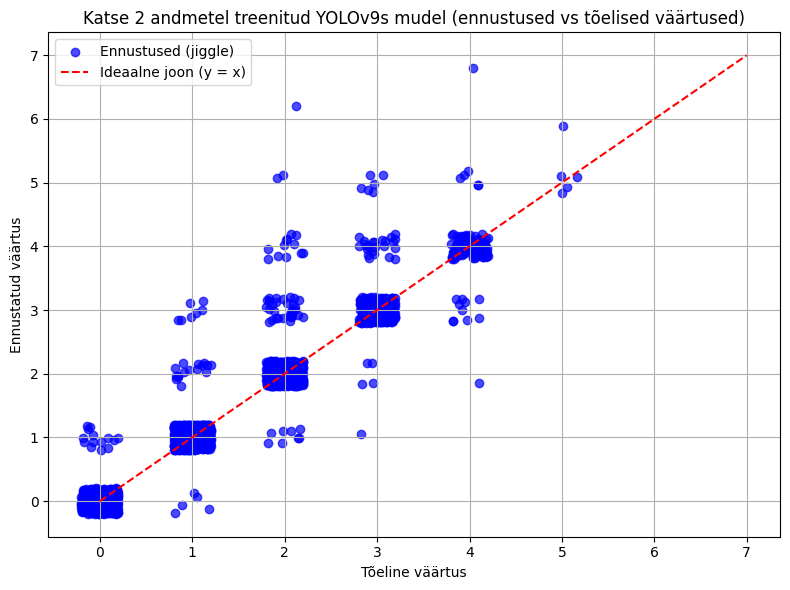

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lae CSV andmed
df = pd.read_csv('/content/drive/MyDrive/Lõputöö Mudel/parim_mudel_t2.csv')

# Eeldame, et veerud on 'true_persons' ja 'predicted_persons'
true_values = df['true_persons']
predicted_values = df['predicted_persons']

# Lisa väike juhuslik müra (jiggle) täppidele, et need ei kattuks täielikult
jiggle_amount = 0.2  # saad muuta nt 0.2 kui tahad rohkem hajutust
true_values_jiggled = true_values + np.random.uniform(-jiggle_amount, jiggle_amount, size=len(true_values))
predicted_values_jiggled = predicted_values + np.random.uniform(-jiggle_amount, jiggle_amount, size=len(predicted_values))

# Graafiku joonistamine
plt.figure(figsize=(8, 6))
plt.scatter(true_values_jiggled, predicted_values_jiggled, color='blue', alpha=0.7, label='Ennustused (jiggle)')

# Lisa ideaaljoon y = x
min_val = min(true_values.min(), predicted_values.min())
max_val = max(true_values.max(), predicted_values.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideaalne joon (y = x)')

# Lisa sildid ja legend
plt.xlabel('Tõeline väärtus')
plt.ylabel('Ennustatud väärtus')
plt.title('Katse 2 andmetel treenitud YOLOv9s mudel (ennustused vs tõelised väärtused)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Moving drone model

In [ ]:
# Load the trained model
model = YOLO('/content/drive/MyDrive/Lõputöö Mudel/models/YOLOv9sBest/custom_yolov11_colab/weights/best.pt')


# Paths
images_dir = Path('/content/drive/MyDrive/Lõputöö Mudel/real_val/images')
labels_dir = Path('/content/drive/MyDrive/Lõputöö Mudel/real_val/labels')  # usually .txt files

# Prepare dataframe to store results
results_data = []

# Iterate over all image files
for image_path in images_dir.glob("*.jpg"):  # Assuming images are .jpg
    # Run prediction
    result = model(image_path)[0]

    # Count detected people (assuming class 0 is person)
    predicted_persons = sum(1 for c in result.boxes.cls if int(c) == 0)

    # Get corresponding label file
    label_path = labels_dir / (image_path.stem + '.txt')

    # Count ground truth persons
    if label_path.exists():
        with open(label_path, 'r') as f:
            true_persons = sum(1 for line in f if line.strip().startswith('0'))  # Class 0 is person
    else:
        true_persons = 0

    # Append results
    results_data.append({
        'image': image_path.name,
        'predicted_persons': predicted_persons,
        'true_persons': true_persons
    })

# Convert to DataFrame
df = pd.DataFrame(results_data)

# Save to CSV
csv_output_path = '/content/drive/MyDrive/Lõputöö Mudel/parim_mudel_t3.csv'
df.to_csv(csv_output_path, index=False)

print(f"Results saved to {csv_output_path}")

Streaming output truncated to the last 5000 lines.
Speed: 2.7ms preprocess, 28.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Lõputöö Mudel/real_val/images/thermal1_0032_jpg.rf.b2923000de94f21917b0eff264795809.jpg: 640x640 1 humans, 20.2ms
Speed: 2.0ms preprocess, 20.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Lõputöö Mudel/real_val/images/thermal1_0041_jpg.rf.6217c0943cac1952877fd51f07ad5d9d.jpg: 640x640 1 humans, 20.1ms
Speed: 1.8ms preprocess, 20.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Lõputöö Mudel/real_val/images/thermal1_0028_jpg.rf.b97f47157058a3c2ed290037ce9b00c5.jpg: 640x640 1 humans, 20.2ms
Speed: 1.9ms preprocess, 20.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Lõputöö Mudel/real_val/images/thermal1_0038_jpg.rf.5658ddaaa9237a7437b840a53a2f7c0e

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the saved results
df = pd.read_csv('/content/drive/MyDrive/Lõputöö Mudel/parim_mudel_t3.csv')

# Extract true and predicted counts
true_counts = df['true_persons'].values
predicted_counts = df['predicted_persons'].values

# Compute MAE and RMSE
mae = mean_absolute_error(true_counts, predicted_counts)
rmse = np.sqrt(mean_squared_error(true_counts, predicted_counts))

print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")

MAE (Mean Absolute Error): 0.22
RMSE (Root Mean Squared Error): 0.54


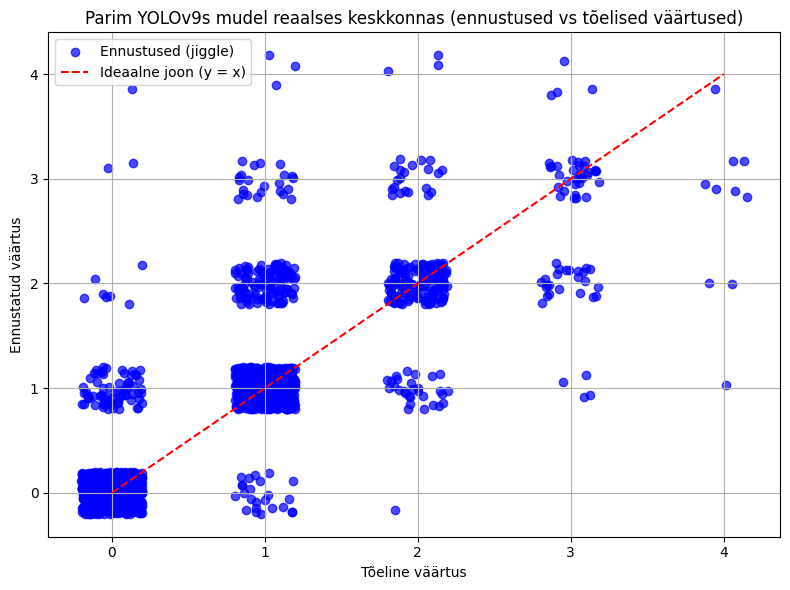

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lae CSV andmed
df = pd.read_csv('/content/drive/MyDrive/Lõputöö Mudel/parim_mudel_t3.csv')

# Eeldame, et veerud on 'true_persons' ja 'predicted_persons'
true_values = df['true_persons']
predicted_values = df['predicted_persons']

# Lisa väike juhuslik müra (jiggle) täppidele, et need ei kattuks täielikult
jiggle_amount = 0.2  # saad muuta nt 0.2 kui tahad rohkem hajutust
true_values_jiggled = true_values + np.random.uniform(-jiggle_amount, jiggle_amount, size=len(true_values))
predicted_values_jiggled = predicted_values + np.random.uniform(-jiggle_amount, jiggle_amount, size=len(predicted_values))

# Graafiku joonistamine
plt.figure(figsize=(8, 6))
plt.scatter(true_values_jiggled, predicted_values_jiggled, color='blue', alpha=0.7, label='Ennustused (jiggle)')

# Lisa ideaaljoon y = x
min_val = min(true_values.min(), predicted_values.min())
max_val = max(true_values.max(), predicted_values.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideaalne joon (y = x)')

# Lisa sildid ja legend
plt.xlabel('Tõeline väärtus')
plt.ylabel('Ennustatud väärtus')
plt.title('Parim YOLOv9s mudel reaalses keskkonnas (ennustused vs tõelised väärtused)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Lõputöö Mudel/parim_mudel_t3.csv')

correct_predictions = (abs(df['true_persons'] - df['predicted_persons']) <= 0).sum()
total = len(df)
accuracy = correct_predictions / total
print(f"Täpsus : {accuracy:.2%}")

Täpsus : 80.66%


In [ ]:
# Load the trained model
model = YOLO('/content/drive/MyDrive/Lõputöö Mudel/models/YOLOv9s/custom_yolov9s_colab2/weights/best.pt')


# Paths
images_dir = Path('/content/drive/MyDrive/Lõputöö Mudel/val/images')
labels_dir = Path('/content/drive/MyDrive/Lõputöö Mudel/val/labels')  # usually .txt files

# Prepare dataframe to store results
results_data = []

# Iterate over all image files
for image_path in images_dir.glob("*.jpg"):  # Assuming images are .jpg
    # Run prediction
    result = model(image_path)[0]

    # Count detected people (assuming class 0 is person)
    predicted_persons = sum(1 for c in result.boxes.cls if int(c) == 0)

    # Get corresponding label file
    label_path = labels_dir / (image_path.stem + '.txt')

    # Count ground truth persons
    if label_path.exists():
        with open(label_path, 'r') as f:
            true_persons = sum(1 for line in f if line.strip().startswith('0'))  # Class 0 is person
    else:
        true_persons = 0

    # Append results
    results_data.append({
        'image': image_path.name,
        'predicted_persons': predicted_persons,
        'true_persons': true_persons
    })

# Convert to DataFrame
df = pd.DataFrame(results_data)

# Save to CSV
csv_output_path = '/content/drive/MyDrive/Lõputöö Mudel/mudel1_andmetel2.csv'
df.to_csv(csv_output_path, index=False)

print(f"Results saved to {csv_output_path}")

Streaming output truncated to the last 5000 lines.
Speed: 2.0ms preprocess, 28.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Lõputöö Mudel/val/images/thermal2_0369_jpg.rf.ab988ca1319981e9efd93a63beb757a7.jpg: 640x640 1 humans, 20.2ms
Speed: 2.3ms preprocess, 20.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Lõputöö Mudel/val/images/aug_frame_2329_jpg.rf.9fa208d42e7105250b727abd6b754f55.jpg: 640x640 3 humanss, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Lõputöö Mudel/val/images/aug_frame_2009_jpg.rf.4028d3839f438fcd5e110fe6fa7fae48.jpg: 640x640 2 humanss, 28.5ms
Speed: 2.7ms preprocess, 28.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Lõputöö Mudel/val/images/aug_cam4_0923_jpg.rf.5175213c2499d903026d712819537823.jpg: 640x640 1 

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the saved results
df = pd.read_csv('/content/drive/MyDrive/Lõputöö Mudel/mudel1_andmetel2.csv')

# Extract true and predicted counts
true_counts = df['true_persons'].values
predicted_counts = df['predicted_persons'].values

# Compute MAE and RMSE
mae = mean_absolute_error(true_counts, predicted_counts)
rmse = np.sqrt(mean_squared_error(true_counts, predicted_counts))

print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")

MAE (Mean Absolute Error): 0.16
RMSE (Root Mean Squared Error): 0.50


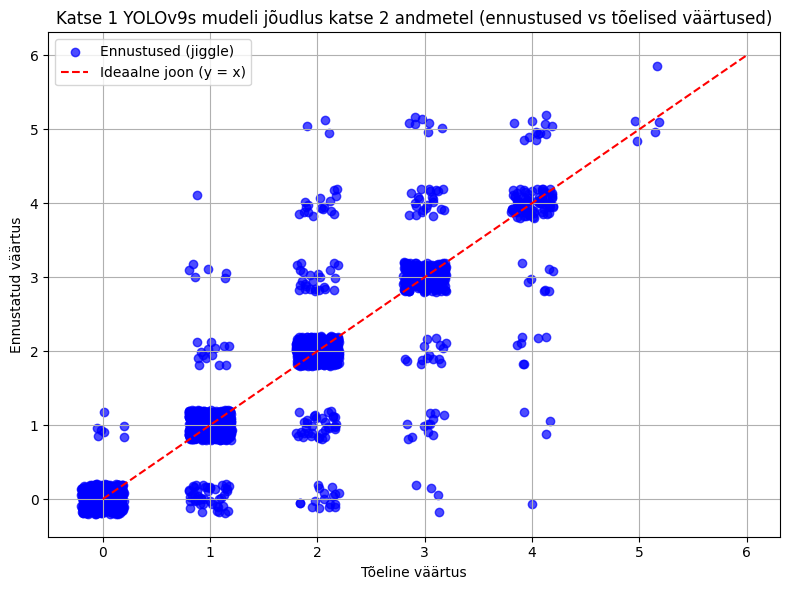

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lae CSV andmed
df = pd.read_csv('/content/drive/MyDrive/Lõputöö Mudel/mudel1_andmetel2.csv')

# Eeldame, et veerud on 'true_persons' ja 'predicted_persons'
true_values = df['true_persons']
predicted_values = df['predicted_persons']

# Lisa väike juhuslik müra (jiggle) täppidele, et need ei kattuks täielikult
jiggle_amount = 0.2  # saad muuta nt 0.2 kui tahad rohkem hajutust
true_values_jiggled = true_values + np.random.uniform(-jiggle_amount, jiggle_amount, size=len(true_values))
predicted_values_jiggled = predicted_values + np.random.uniform(-jiggle_amount, jiggle_amount, size=len(predicted_values))

# Graafiku joonistamine
plt.figure(figsize=(8, 6))
plt.scatter(true_values_jiggled, predicted_values_jiggled, color='blue', alpha=0.7, label='Ennustused (jiggle)')

# Lisa ideaaljoon y = x
min_val = min(true_values.min(), predicted_values.min())
max_val = max(true_values.max(), predicted_values.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideaalne joon (y = x)')

# Lisa sildid ja legend
plt.xlabel('Tõeline väärtus')
plt.ylabel('Ennustatud väärtus')
plt.title('Katse 1 YOLOv9s mudeli jõudlus katse 2 andmetel (ennustused vs tõelised väärtused)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
